In [2]:
import sys
import os
sys.path.append(os.path.join(".","nptools"))

#Jseq = "GCTCAGTGGTGTACGGTACAAACCAGTAGCTAGCATTATACCTAGGACTGAGCTAGCTGTCAGCTCCGGCTTGTCGACGACGGCGT"
#Pseq = "GCTCAGTGGTGTACGGTACAAACCAGTATCCACACATTATACGAGCCGGATGATTAAATTGAAACTCCGGCTTGTCGACGACGGCGT"

Jonly = "CTGACAGCTAGCTCAGTCCTAGGTATAATGCTAGC" #this one is on the "CC" plasmid
Ponly = "TTTCAATTTAATCATCCGGCTCGTATAATGTGTGGA" #this one is on the "PA" plasmid
bc0 = "AGTAGCACTAGGCAATTTGTTCCGTATTGAAGAGACAGC" #I accidentally put this one on both plasmids, then changed to below
bc1 = "ACCAATGGAGCAGGAATAGTTACTCATCAGCTGGTGAG" #this one is usually associated with the "CC" plasmid
bc2 = "CTAGTTAGATGATAAACTAGTTGCTTGGAACGAACCGG" #this one is associated with the "PA" plasmid
beginner =     "CAAGCCCATTATTACCCTGTTATCCCTAGACACCAATCAGAGGCCACA"#"TCGACGACGGCGTG")
attBsiteU21R = "CCCAGCAGGTATGATCCTGACGACGGAGCACGCCGTCGTCGACAAGCC"#"AGTTCGTAGACGGA")
U21primerend = "GTACAAACCAGTAGCTAGCATTATACCTAGGACTGAGCTAGCTGTCAGCTCCGGCTTGTC"+\
                "GACGACGGCGTGCTCCGTCGTCAGGATCATACCTGCTGGGAGTTCGTAGACGGA"

U22primerend = "GCTCAGTGGTGTACGGTACAAACCAGTATCCACACATTATACGAGCCGGATGATTAAAT"+\
                "TGAAACTCCGGCTTGTCGACGACGGCGTGCTCCGTCGTCAGGATCATACCTAACAAACGCAGAATCCAAGC"


barcodes = {
    "BC01":"AAGAAAGTTGTCGGTGTCTTTGT",
    "BC02":"TCGATTCCGTTTGTAGTCGTCTG",
    "BC03":"GAGTCTTGTGTCCCAGTTACCAG",
    "BC04":"TTCGGATTCTATCGTGTTTCCCT",
    "BC05":"CTTGTCCAGGGTTTGTGTAACCT",
    "BC06":"TTCTCGCAAAGGCAGAAAGTAGT",
    "BC07":"GTGTTACCGTGGGAATGAATCCT",
    "BC08":"TTCAGGGAACAAACCAAGTTACG",
    "BC09":"AACTAGGCACAGCGAGTCTTGGT",
    "BC10":"AAGCGTTGAAACCTTTGTCCTCT",
    "BC11":"GTTTCATCTATCGGAGGGAATGG",
    "BC12":"CAGGTAGAAAGAAGCAGAATCGG",
    "BC13":"AGAACGACTTCCATACTCGTGTG",
    "BC14":"AACGAGTCTCTTGGGACCCATAG",
    "BC15":"AGGTCTACCTCGCTAACACCACT"
    }
from nanopore_scripts import *
for bc in barcodes:
    barcodes[bc]= (barcodes[bc],rc(barcodes[bc]))
print("done")

done


In [3]:
import glob
fastqdirectory = os.path.join(".","data")
#print(glob.glob(os.path.join(fastqdirectory,"*.fastq")))
fastqfilename = None
i = 3
processreads = 500000
#testread = rc(testread)[slicing[0]:slicing[1]] #[298+86-12:298+86+86+12]#[130:212]
seqstats = [0,0,0]
attb_detection_threshold = len(attBsiteU21R)/5
frontchecklength = 150
""
allseqDict,seqstats,unsorted=barcodeSplitAndCountRecords(fastqdirectory,barcodes,\
                                                barcode_detection_threshold=7,\
                                                end_threshold=12,\
                                                processreads=processreads,\
                                               prefix_detection_threshold=12,\
                                               variable_sequence_threshold=12,\
                                                         variable_sequences=[Jonly,Ponly,bc1,bc2],\
                                                frontchecklength=frontchecklength)

allseqdictpart2,seqstatspart2,unsortedpart2 = barcodeSplitAndCountRecords(unsorted,barcodes,\
                                                barcode_detection_threshold=7,\
                                                end_threshold=12,\
                                                processreads=processreads,\
                                               prefix_detection_threshold=12,\
                                               variable_sequence_threshold=12,\
                                                        variable_sequences=[Jonly,Ponly,bc1,bc2],\
                                                frontchecklength=frontchecklength)

print("we had {} forward, {} reverse, and {} where we couldn't tell".format(seqstats[0],seqstats[1],seqstats[2]))
print("we had {} forward, {} reverse, and {} where we couldn't tell the second time".\
                                                      format(seqstatspart2[0],seqstatspart2[1],seqstatspart2[2]))
bcwefound =sorted(allseqDict.keys())
numseqs = [len(allseqDict[a]) for a in bcwefound]
[print("{}:{}".format(a[0],a[1])) for a in zip(bcwefound,numseqs)]
print("{} sequences were split from existing ones".format(len(unsorted)))
print("now, operating on the split sequences...")
bcwefound =sorted(allseqdictpart2.keys())
numseqs = [len(allseqdictpart2[a]) for a in bcwefound]
[print("{}:{}".format(a[0],a[1])) for a in zip(bcwefound,numseqs)]
print("{} sequences were split from existing ones".format(len(unsortedpart2)))

for a in allseqdictpart2:
    allseqDict[a] = allseqDict[a]+allseqdictpart2[a]
print("final totals are:")
bcwefound =sorted(allseqDict.keys())
numseqs = [len(allseqDict[a]) for a in bcwefound]
[print("{}:{}".format(a[0],a[1])) for a in zip(bcwefound,numseqs)]
#print(U21primerend)
#print(allseqDict["BC01"])
#print(testread)
#help(edlib.align)

FloatProgress(value=0.0, max=1.0)

92


FloatProgress(value=0.0, max=1.0)

we had 158611 forward, 22677 reverse, and 186712 where we couldn't tell
we had 466 forward, 61 reverse, and 1602 where we couldn't tell the second time
BC01:40721
BC02:12397
BC03:30924
BC04:5757
BC05:51659
BC06:4978
BC07:28696
BC08:5492
BC09:37580
BC10:35329
BC11:43847
BC12:34837
BC13:69
BC14:13
BC15:54
none:35647
2129 sequences were split from existing ones
now, operating on the split sequences...
BC01:14
BC02:35
BC03:23
BC04:11
BC05:35
BC06:18
BC07:12
BC08:31
BC09:26
BC10:17
BC11:28
BC12:21
BC14:1
BC15:7
none:1850
36 sequences were split from existing ones
final totals are:
BC01:40735
BC02:12432
BC03:30947
BC04:5768
BC05:51694
BC06:4996
BC07:28708
BC08:5523
BC09:37606
BC10:35346
BC11:43875
BC12:34858
BC13:69
BC14:14
BC15:61
none:37497


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [4]:
#Now we save our barcoded data into a pickle!!
import pickle
save_barcoded_file="191015_simprec.pickl"
try:
    keylen = len(allseqDict.keys())
    if(keylen > 0):
        with open(os.path.join(".","output",save_barcoded_file),"wb") as saved_file:
            pickle.dump(allseqDict,saved_file)
    else:
        print("didn't save becase the data member was empty")
except NameError:
    print("didn't save because the data member didn't exist")

In [5]:
import pickle
import pandas
import os
save_barcoded_file="191015_simprec.pickl"
input_conditions_file = "191014_input.csv"

experiment_dataframe = pandas.read_csv(os.path.join(".","input",input_conditions_file)).fillna(0)

with open(os.path.join(".","output",save_barcoded_file),'rb') as saved_file:
    allseqDict = pickle.load(saved_file)

In [41]:
bcnum = 3
bclist = sorted([a for a in allseqDict.keys()])
print("barcode number "+str(bcnum))
print('\n'.join([b+" has "+ str(sum([a.count(bcnum) for a in allseqDict[b]])) for b in bclist]))

barcode number 3
BC01 has 6
BC02 has 0
BC03 has 6
BC04 has 1
BC05 has 2
BC06 has 0
BC07 has 2
BC08 has 2
BC09 has 2
BC10 has 4
BC11 has 14
BC12 has 3
BC13 has 0
BC14 has 0
BC15 has 0
none has 6


In [46]:
#load the pickle!!! Also load conditions from a file!!!
import pickle
import pandas
import os
save_barcoded_file="191015_simprec.pickl"
input_conditions_file = "191014_input.csv"

experiment_dataframe = pandas.read_csv(os.path.join(".","input",input_conditions_file)).fillna(0)

with open(os.path.join(".","output",save_barcoded_file),'rb') as saved_file:
    allseqDict = pickle.load(saved_file)


#bclists = []
#bclists = [simprec.BC01,simprec.BC02,simprec.BC03,simprec.BC04,simprec.BC05,\
#           simprec.BC06,simprec.BC07,simprec.BC08,simprec.BC09,simprec.BC10,\
#           simprec.BC11,simprec.BC12,simprec.BC13,simprec.BC14,simprec.BC15,\
#           simprec.none]
#bcnames = ["BC01","BC02","BC03","BC04","BC05",\
#           "BC06","BC07","BC08","BC09","BC10",\
#           "BC11","BC12","BC13","BC14","BC15","none"]

#bcDict = {a[0]:a[1] for a in zip(bcnames,bclists)}
PJdict = {}
letters = ["J","P","E","Q"]
for bc in experiment_dataframe["barcode"]:
    seqs = []
    for seq in allseqDict[bc]:
        convertedseq = ""
        for element in seq:
            if(element in range(len(letters))):
                convertedseq += letters[element]
        if(convertedseq != ""):
            newseq = convertedseq [:-1]
            if(newseq != "" and len(newseq)>1):
                seqs+=[newseq]
    PJdict[bc] = seqs
#print(PJdict["BC01"])

all_lists,run_lists,switch_lists,first_last = countBarcodeStats(PJdict,chopseqs='left')
stats_counted = [
    (["total Ps in a read","total Js in a read"],all_lists),
    (["longest P run in a read","longest J run in a read"],run_lists),
    (["PJ", "JP"],switch_lists),
    (["P/J, first","P/J, last"],first_last),
]

In [46]:
experiment_dataframe[experiment_dataframe["barcode"]=="BC01"].iloc[0]

SAL           5
CIN           0
ATC           0
ink0         g0
ink1         g4
rec         r48
barcode    BC01
Name: 0, dtype: object

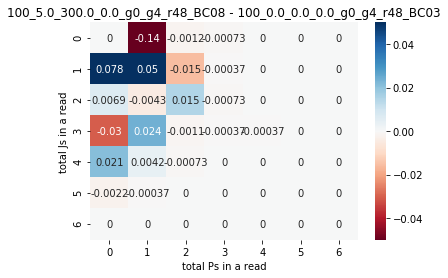

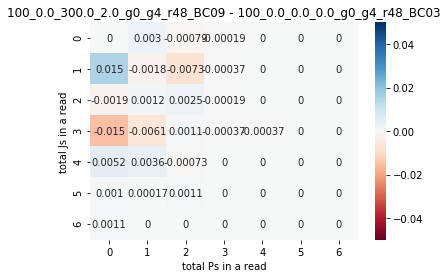

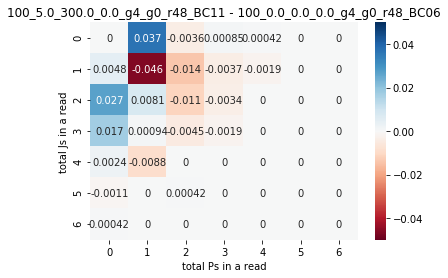

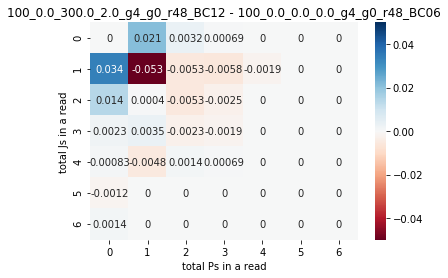

In [51]:
stat = 0

labs = stats_counted[stat][0]
dlist = stats_counted[stat][1]

#crange = [0,.01,6]
crange = [0,.02,1]
sqrange = [-.5,6.5]

diffPlotWrapper("BC03","BC08",experiment_dataframe,dlist,labs=labs)
diffPlotWrapper("BC03","BC09",experiment_dataframe,dlist,labs=labs)

diffPlotWrapper("BC06","BC11",experiment_dataframe,dlist,labs=labs)
diffPlotWrapper("BC06","BC12",experiment_dataframe,dlist,labs=labs)

#makeBCplot1("BC07",crange,sqrange,experiment_dataframe,dlist,labs)
#makeBCplot1("BC08",crange,sqrange,experiment_dataframe,dlist,labs)
#makeBCplot1("BC09",crange,sqrange,experiment_dataframe,dlist,labs)

#makeBCplot1("BC10",crange,sqrange,experiment_dataframe,dlist,labs)
#makeBCplot1("BC11",crange,sqrange,experiment_dataframe,dlist,labs)
#makeBCplot1("BC12",crange,sqrange,experiment_dataframe,dlist,labs)
print("")
#diffPlotWrapper("BC03","BC06",experiment_dataframe,dlist,labs=labs)
#diffPlotWrapper("BC02","BC07",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC03","BC08",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC04","BC09",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC05","BC10",conditions,bcnames,dlist,labs=labs)

#diffPlotWrapper("BC01","BC11",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC02","BC12",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC03","BC13",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC04","BC14",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC05","BC15",conditions,bcnames,dlist,labs=labs)

#diffPlotWrapper("BC14","BC13",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC15","BC13",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC05","BC10",conditions,bcnames,dlist)

#diffPlotWrapper("BC03","BC13",conditions,bcnames,dlist)
#diffPlotWrapper("BC04","BC14",conditions,bcnames,dlist)
#diffPlotWrapper("BC05","BC15",conditions,bcnames,dlist)

#diffPlotWrapper("BC02","BC12",conditions,bcnames,dlist)
#diffPlotWrapper("BC05","BC09",conditions,bcnames,dlist)
#diffPlotWrapper("BC04","BC08",conditions,bcnames,dlist)



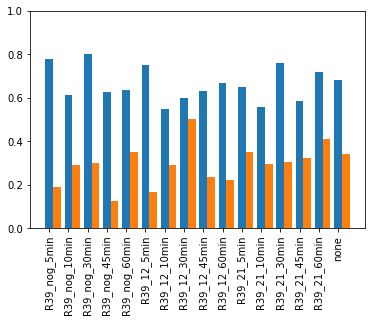

In [52]:
plotbcnames = bcnames #[:10]
ticks = np.arange(len(plotbcnames))-.4
secondticks = np.arange(len(plotbcnames))
first_barcode = [first_last[a][0]/float(first_last[a][2]) for a in plotbcnames]
second_barcode = [first_last[a][1]/float(first_last[a][2]) for a in plotbcnames]
plt.bar(ticks,first_barcode,.4)
plt.bar(secondticks,second_barcode,.4)
plt.ylim(0,1)
#plt.legend(["first","last"])
plt.xticks(ticks,conditions,rotation=90)
pass

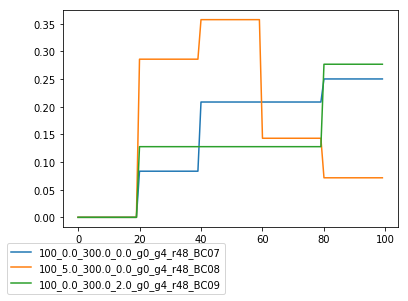

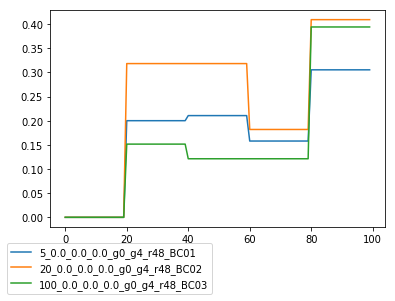

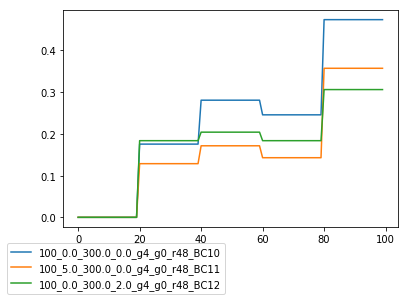

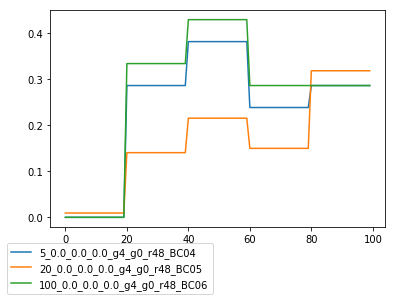

In [18]:
stretch = True
def recorderplots(experiment_dataframe,letters="PJ",stretch=stretch):
    legendlist = []
    bclist = experiment_dataframe["barcode"]
    for bc in bclist:
        x,y,z = quantifyRecOrder(PJdict[bc],letters=letters,stretch=stretch)
        plt.plot(z)
        legend_unit = condNameBC(bc,experiment_dataframe)
        legendlist += [legend_unit]
    plt.legend(legendlist,bbox_to_anchor=(0.5, -0.05),)

    
plotdf = experiment_dataframe[(experiment_dataframe["SAL"]==100) &\
                              (experiment_dataframe["ink0"]=='g0') &\
                              ((experiment_dataframe["ATC"]>0) |\
                             (experiment_dataframe["CIN"]>0))]
recorderplots(plotdf)
plt.figure()
plotdf = experiment_dataframe[(experiment_dataframe["ink0"]=='g0') &\
                              ((experiment_dataframe["ATC"]==0))]
recorderplots(plotdf)
plt.figure()
plotdf = experiment_dataframe[(experiment_dataframe["SAL"]==100) &\
                              (experiment_dataframe["ink0"]=='g4') &\
                              ((experiment_dataframe["ATC"]>0) |\
                             (experiment_dataframe["CIN"]>0))]
recorderplots(plotdf)
plt.figure()
plotdf = experiment_dataframe[(experiment_dataframe["ink0"]=='g4') &\
                              ((experiment_dataframe["ATC"]==0))]
recorderplots(plotdf)